Your assignment this week is again to recreate an example notebook in Python.

Download this week's example (right-click, save link as):

03 - Pandas - Data Structures Continued

You can recreate the given examples directly in your own notebook provided you change the variable names, string examples, numbers, etc. (e.g. The example has x=2, you write y=3). To be given credit you must alter every example you include in your submission. However, for all graphs and plots you do not have to change and these can be replicated exactly as in the examples provided.

This week you must included the following sections / items in your submission from the Week 3 notebook.

1. Everything in the "part 2: data" and "part 3: plotting" sections using pandas.

2. Three graphs from each of the last 3 sections using seaborn:

- Visualizing the distribution of a dataset

- Plotting univariate distributions

- Plotting bivariate distributions

- Visualizing pairwise relationships in a dataset

- Visualizing linear relationships

- Plotting with categorical data

In [36]:
%matplotlib inline
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "distributions")))



## 1a. Part 2: Data

In [2]:
gnacs_x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
twit_colnames = gnacs_x.split('|')
twit_colnames
type(twit_colnames)

list

In [3]:
pd.set_option("display.max_columns", None)

In [5]:
twit_df = pd.read_csv('twitter_sample.csv', sep='|', names=twit_colnames)
twit_df.tail(3)

del twit_df['None']
twit_df.tail(3)



,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
92,"tag:search.twitter.com,2005:351835321425608704",2013-07-01T22:50:52.000Z,"O matheus André ta me falando aqui , tem quase...",None,None,['pt'],pt,pt,"[-22.72046574, -43.57919689]",Point,"['[-43.645123999999996, -22.783967999999998]',...",Polygon,"Queimados, Rio de Janeiro",BR,-10800,Rio de Janeiro,None,None,None,None,None,None,None,None,Shelyda,ShelydaDays,70959019,40,128,76,0,1419,Tweet,None,None,None
93,"tag:search.twitter.com,2005:351835320859369475",2013-07-01T22:50:51.000Z,@Mulayhim hatha bs one exam. Other exams y6l3o...,None,None,['en'],en,en,"[52.21599153, 6.88528201]",Point,"['[6.7559955, 52.1611799]', '[6.7559955, 52.28...",Polygon,Enschede,NL,3600,Netherlands\Enschede,None,None,None,None,None,None,None,None,L,Karkooba,1252736376,30,48,88,0,957,Reply,http://twitter.com/Mulayhim/statuses/351817617...,None,None
94,"tag:search.twitter.com,2005:351835321471746048",2013-07-01T22:50:52.000Z,😕 Hmm...,None,None,['en'],None,en,"[42.21746118, -78.03367083]",Point,"['[-78.045887, 42.212985]', '[-78.045887, 42.2...",Polygon,"Belmont, NY",US,None,None,None,None,None,None,None,None,None,None,Lindsey Chamberlain,Linnyy_Kayy,466042520,41,198,188,0,1897,Tweet,None,None,None


### Slicing and Combing

In [6]:
twit_df[twit_df.twitter_lang == 'en'].head()

,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
8,"tag:search.twitter.com,2005:351835318028222465",2013-07-01T22:50:51.000Z,@pafcdan Aww good! X,None,None,['en'],en,en,"[50.3582949, -4.0930973]",Point,"['[-4.209496, 50.3320883]', '[-4.209496, 50.44...",Polygon,"Plymouth, Plymouth",GB,0,Plymouth,None,None,None,None,None,None,None,None,Becky ❤,BeckyLou90x,26568635,38,380,860,0,3116,Reply,http://twitter.com/pafcdan/statuses/3518344574...,None,None
9,"tag:search.twitter.com,2005:351835318346981377",2013-07-01T22:50:51.000Z,Newest hobby: sending videos back and forth of...,None,None,['en'],en,en,"[29.54588264, -95.10669141]",Point,"['[-95.145152, 29.506973]', '[-95.145152, 29.5...",Polygon,"Webster, TX",US,None,"Houston, Texas",None,None,None,None,None,None,None,None,lil beyoncé,beezlebrat,541953037,41,160,135,0,4170,Tweet,None,None,None
11,"tag:search.twitter.com,2005:351835318024028161",2013-07-01T22:50:51.000Z,~FINALLY OFF OF WORK~,None,None,['en'],en,en,"[32.86107, -83.72062]",Point,"['[-83.739741, 32.765651]', '[-83.739741, 32.8...",Polygon,"Macon, GA",US,None,None,None,None,None,None,None,None,None,None,Tomeisha Cross,MISSMEISHA223,242505369,18,290,683,0,540,Tweet,None,None,None
12,"tag:search.twitter.com,2005:351835318497980416",2013-07-01T22:50:51.000Z,Rubbing/massaging my feet is like giving me he...,None,None,['en'],en,en,"[33.68890281, -84.27369741]",Point,"['[-85.605165, 30.355756999999997]', '[-85.605...",Polygon,"Georgia, US",US,-18000,Atl...,None,None,None,None,None,None,None,None,Poison †,shanbonita,29619102,64,40543,116,486,60465,Tweet,None,None,None
15,"tag:search.twitter.com,2005:351835318724468737",2013-07-01T22:50:51.000Z,@Hayley_Brownn Same!!!! Very sad times😞😞😞😞,None,None,['en'],en,en,"[54.6884467, -3.51776393]",Point,"['[-3.580063, 54.454108]', '[-3.580063, 54.964...",Polygon,"Allerdale, Cumbria",GB,-36000,None,None,None,None,None,None,None,None,None,Karl Hine,KarlHine,402334657,42,417,259,1,5242,Reply,http://twitter.com/Hayley_Brownn/statuses/3518...,None,None


In [13]:
twit_df_num = twit_df[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount"]]

twit_df_num.head()
twit_df_num.dtypes

gnip:klout_score        object
actor:followersCount     int64
actor:friendsCount       int64
actor:listedCount        int64
dtype: object

In [14]:
def typeToFloat(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)

In [16]:
twit_df_num['gnip:klout_score'] = twit_df_num['gnip:klout_score'].map(typeToFloat)

twit_df_num.dtypes

C:\Users\somsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


gnip:klout_score        float64
actor:followersCount      int64
actor:friendsCount        int64
actor:listedCount         int64
dtype: object

In [18]:
twit_df_num = twit_df_num.astype(float)

twit_df_num.dtypes

gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
dtype: object

In [19]:
twit_df_num['fol:frnd'] = twit_df_num['gnip:klout_score'] / twit_df_num['actor:followersCount']

In [20]:
twit_df_num.head()

,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,fol:frnd
0,35.0,178.0,129.0,0.0,0.196629
1,32.0,144.0,215.0,0.0,0.222222
2,18.0,37.0,54.0,0.0,0.486486
3,50.0,438.0,174.0,1.0,0.114155
4,21.0,12.0,6.0,0.0,1.750000


### Grouping

In [21]:
twit_df.head()

,id,postedTime,body,['twitter_entiteis:urls:url'],['None'],['actor:languages_list-items'],gnip:language:value,twitter_lang,[u'geo:coordinates_list-items'],geo:type,None.1,None.2,None.3,None.4,actor:utcOffset,None.5,None.6,None.7,None.8,None.9,None.10,None.11,None.12,None.13,actor:displayName,actor:preferredUsername,actor:id,gnip:klout_score,actor:followersCount,actor:friendsCount,actor:listedCount,actor:statusesCount,Tweet,None.14,None.15,None.16
0,"tag:search.twitter.com,2005:351835317671690241",2013-07-01T22:50:51.000Z,kavga edelim ama konuşalım,None,None,['tr'],en,tr,None,None,"['[25.663883, 35.817497]', '[25.663883, 42.109...",Polygon,Türkiye,TR,7200,None,None,None,None,None,None,None,None,None,Rümeysa Özdemir,uykugibisiyok,248312738,35,178,129,0,2028,Tweet,None,None,None
1,"tag:search.twitter.com,2005:351835317604593666",2013-07-01T22:50:51.000Z,@shane_joersz wooooow,None,None,['en'],en,es,"[47.29088246, -101.0379045]",Point,"['[-101.043785, 47.275933]', '[-101.043785, 47...",Polygon,"Washburn, ND",US,-21600,sevenohone,None,None,None,None,None,None,None,None,cori▲alex.,CoBerg_,48025164,32,144,215,0,4071,Reply,http://twitter.com/shane_joersz/statuses/35182...,None,None
2,"tag:search.twitter.com,2005:351835317747191808",2013-07-01T22:50:51.000Z,お前との肌のふれあいなんぞ求めてない。自重しろ。,None,None,['ja'],en,ja,"[35.70675048, 139.84273005]",Point,"['[139.8332175, 35.6345694444444]', '[139.8332...",Polygon,"江戸川区, 東京都",JP,-36000,ちば,None,None,None,None,None,None,None,None,黒い恋人,yamasyoyamasyo,217987801,18,37,54,0,3505,Tweet,None,None,None
3,"tag:search.twitter.com,2005:351835317608792064",2013-07-01T22:50:51.000Z,@Gabo_navoficial yo tambien creo en ti mi char...,None,None,['en'],en,es,None,None,"['[-80.248663, 25.986366]', '[-80.248663, 26.0...",Polygon,"Hollywood, FL",US,-14400,hollywood florida,None,None,None,None,None,None,None,None,MARIA,maria_e_pena,461188787,50,438,174,1,17636,Reply,http://twitter.com/Gabo_navoficial/statuses/35...,None,None
4,"tag:search.twitter.com,2005:351835317755592705",2013-07-01T22:50:51.000Z,только ты об этом не знаешь... http://t.co/MOH...,None,None,['ru'],en,ru,None,None,"['[23.179216999999998, 51.2626423]', '[23.1792...",Polygon,Belarus,BY,None,None,None,None,None,None,None,None,None,None,Элька Алб,ElkaAlb,1433828712,21,12,6,0,145,Tweet,None,None,None


In [34]:
populars_df = twit_df[twit_df['actor:followersCount']>100]

populars_df.groupby('twitter_lang').sum()

lang_summary = populars_df[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')

lang_summary.head(1)

lang_summary.dtypes

lang_summary_mean = lang_summary.aggregate(np.mean)
lang_summary_mean.head(5)

,actor:followersCount,actor:friendsCount,actor:statusesCount
twitter_lang,,,
ar,458.000000,413.000000,1061.000000
en,1796.147059,582.735294,16364.352941
es,1359.285714,441.142857,8953.357143
fr,116.000000,122.000000,3174.000000
he,151.000000,284.000000,641.000000


## 1b. Part 3: Plotting

In [36]:
lang_summary_mean.count()

actor:followersCount    15
actor:friendsCount      15
actor:statusesCount     15
dtype: int64

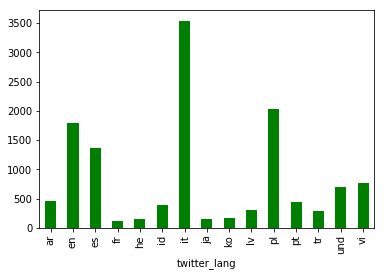

In [39]:
lang_summary_mean['actor:followersCount'].plot(kind='bar',color='g')

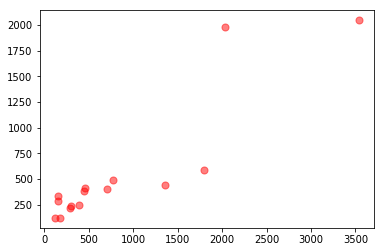

In [44]:
plt.scatter(x=lang_summary_mean['actor:followersCount'], y =lang_summary_mean['actor:friendsCount'], alpha=0.5,                  s=50,\
                    color='red',
                    marker='o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263E9AA5AC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000263E9B6A7F0>]], dtype=object)

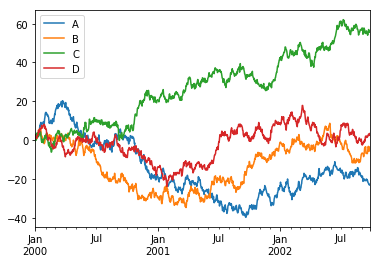

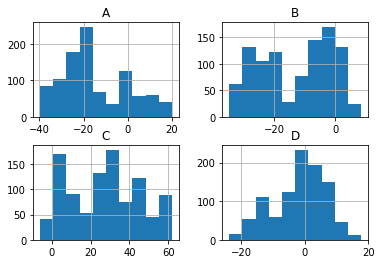

In [48]:
test_df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
test_df = test_df.cumsum()
test_df.head()

test_df.plot()
test_df.hist()

## 3. Visualizing the distribution of a dataset

### 4. Plotting Univariate Distributions

#### 4.a Histogram

In [3]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


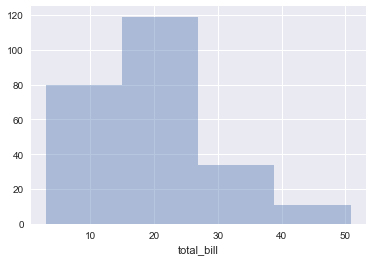

In [7]:
sns.distplot(tips['total_bill'], bins = 4, kde=False, rug=False)

#### 4.b Kernel Density Estimation

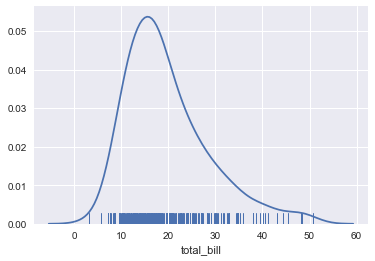

In [8]:
sns.distplot(tips['total_bill'], hist=False, rug=True)

#### 4.c Rugplot

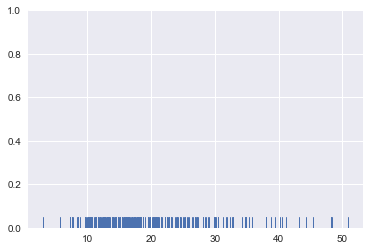

In [9]:
sns.rugplot(tips['total_bill'])

### 5. Plotting bivariate distributions

#### 5a. Scatterplots

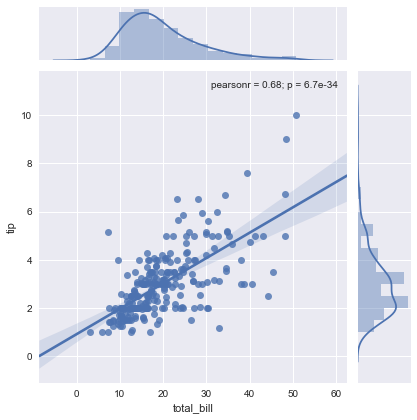

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg') #scatter plot is by default. Reg will draw a regression line

#### 5b. Hexbin Plots

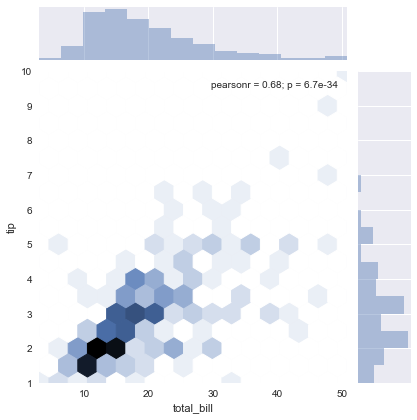

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex') #scatter plot is by default

#### 5c Kernel Density Estimation

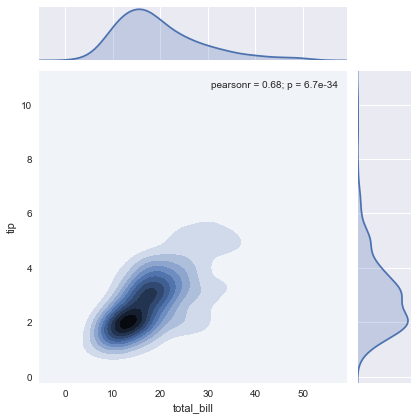

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

### 6. Visualizing pairwise relationships in a dataset

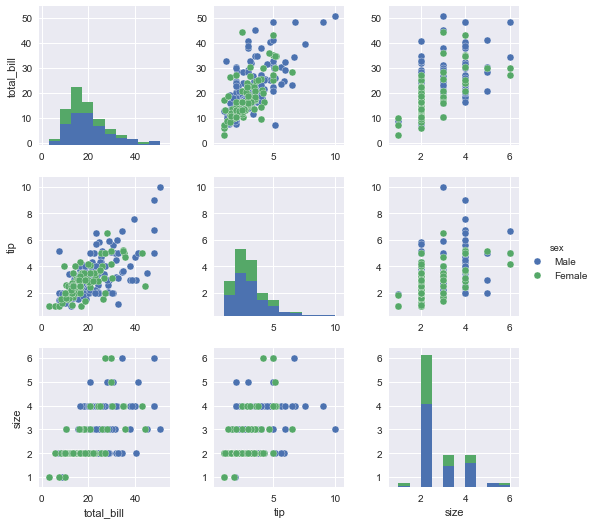

In [19]:
sns.pairplot(tips, hue='sex')

### 7. Visualizing linear relationships

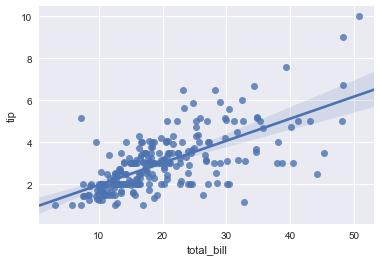

In [20]:
sns.regplot(x='total_bill',y='tip',data=tips)

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


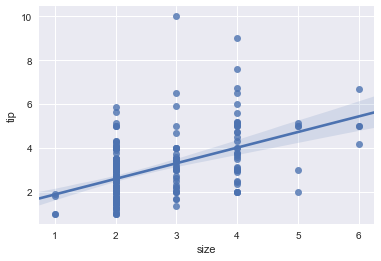

In [32]:
sns.regplot(x='size',y='tip',data=tips)

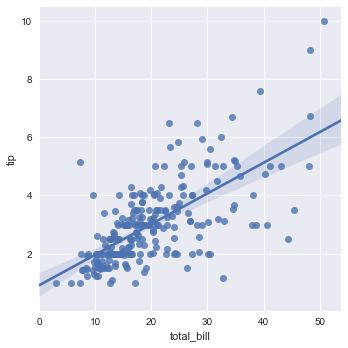

In [33]:
sns.lmplot(x="total_bill", y="tip", data=tips)

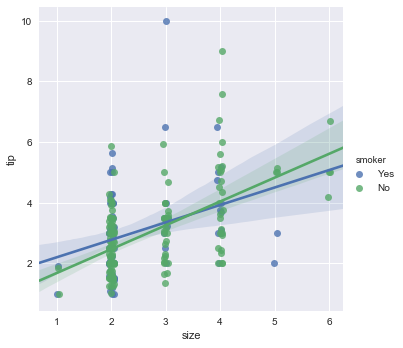

In [35]:
sns.lmplot(x="size", y="tip", hue='smoker', data=tips, x_jitter=.05);

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


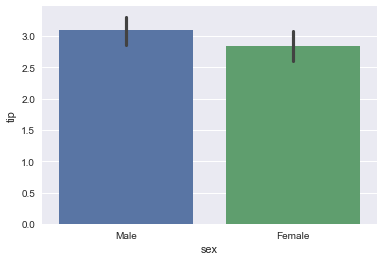

In [38]:
sns.barplot(x='sex',y='tip',data=tips)

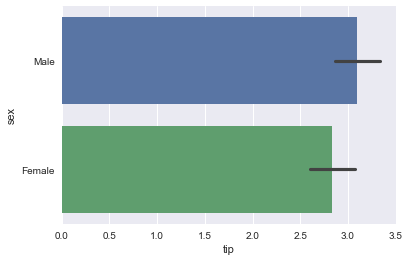

In [39]:
sns.barplot(x='tip',y='sex',data=tips)

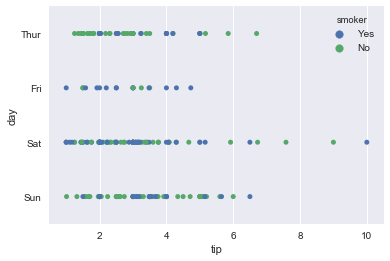

In [42]:
sns.stripplot(x='tip',y='day',data=tips, hue='smoker')

In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
tips['tip/total'] = tips['tip']/tips['total_bill']

In [46]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip/total
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


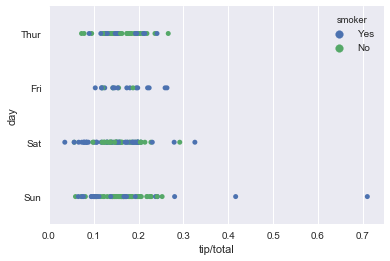

In [49]:
#This will give you the plot based on Tip%. Are customers more generous on certain days? ;)
sns.stripplot(x='tip/total',y='day',data=tips, hue='smoker')

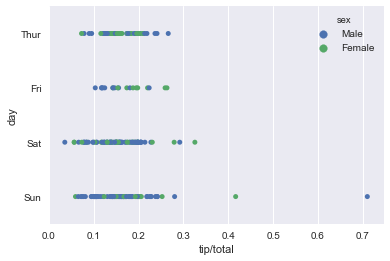

In [51]:
#This will give you the plot based on Tip%. Are customers more generous on certain days? ;)
sns.stripplot(x='tip/total',y='day',data=tips, hue='sex')

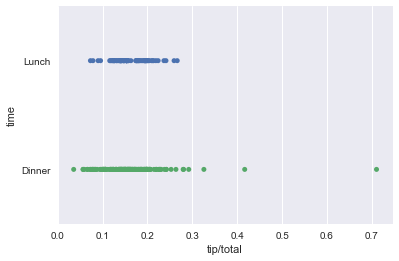

In [55]:
#Are customers more generous during lunch or dinner.
sns.stripplot(x='tip/total',y='time',data=tips)

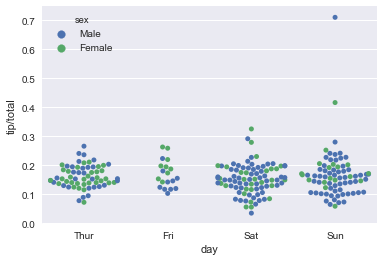

In [52]:
sns.swarmplot(x="day", y="tip/total", hue="sex", data=tips);

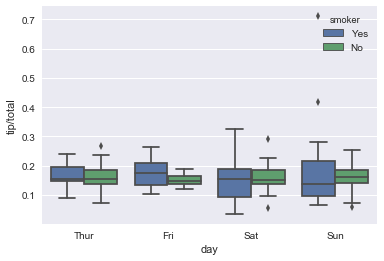

In [60]:
sns.boxplot(x="day", y="tip/total", data=tips,hue='smoker')

In [61]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip/total
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [66]:
tips['weekend'] = (tips['day']=='Sun') | (tips['day']=='Sat')

In [69]:
tips.to_csv('tips_v1.csv')

In [70]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip/total,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,True
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,True
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,True
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,True
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,True


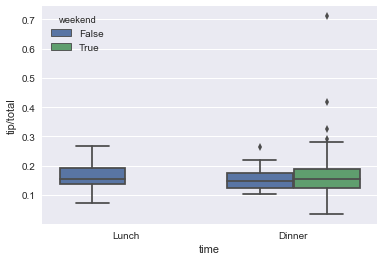

In [71]:
sns.boxplot(x="time", y="tip/total", data=tips,hue='weekend')